<a href="https://colab.research.google.com/github/Trang19/INSE6220/blob/main/Tutorial3tr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()


**Upload files into Colaboratory**

In [65]:
#uploaded = files.upload()

In [66]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Trang19/INSE6220/main/cancer_patient_datasets_3.csv', index_col=0)
##!pip install xlrd
##df = pd.read_excel('cancer_patient_datasets_3.xls')
print(df.head(25))

       Alcohol use  Genetic Risk  Smoking  Chest Pain  Coughing of Blood
index                                                                   
0                4             3        3           2                  4
1                1             4        2           2                  3
2                5             5        2           4                  8
3                7             6        7           7                  8
4                8             7        8           7                  9
5                5             5        2           4                  8
6                4             3        3           2                  4
7                1             2        1           3                  1
8                5             6        6           6                  5
9                3             4        2           4                  4
10               7             7        7           7                  7
11               8             7        7          

In [67]:
#m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data

In [68]:
#normalize data
# Exclude non-numeric columns before normalization
numeric_df = df.select_dtypes(include=np.number)
numeric_df = (numeric_df - numeric_df.mean()) / numeric_df.std()
df[numeric_df.columns] = numeric_df # Update original df with normalized numeric columns

# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Alcohol use        1000 non-null   float64
 1   Genetic Risk       1000 non-null   float64
 2   Smoking            1000 non-null   float64
 3   Chest Pain         1000 non-null   float64
 4   Coughing of Blood  1000 non-null   float64
dtypes: float64(5)
memory usage: 46.9 KB


**Observations and variables**

In [69]:
observations = list(df.index)
variables = list(df.columns)

**Data Visualisation**

<Axes: >

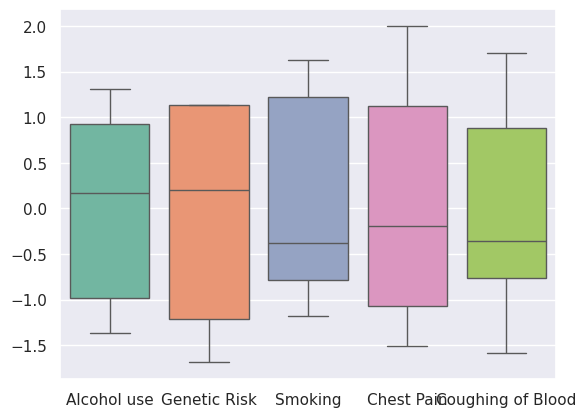

In [70]:
sns.boxplot(data=df, orient="v", palette="Set2")

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.1% of the points cannot be plac

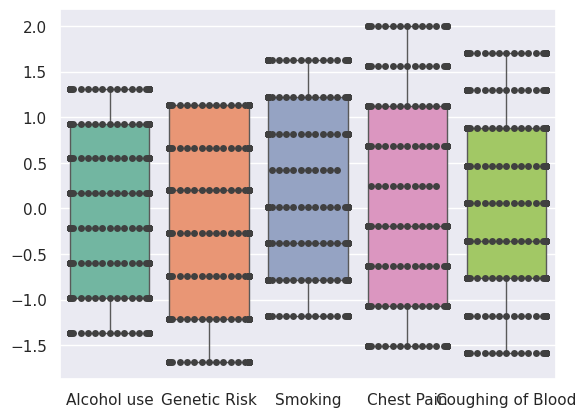

In [71]:
##Use swarmplot() to show the datapoints on top of the boxes:
#plt. figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25")

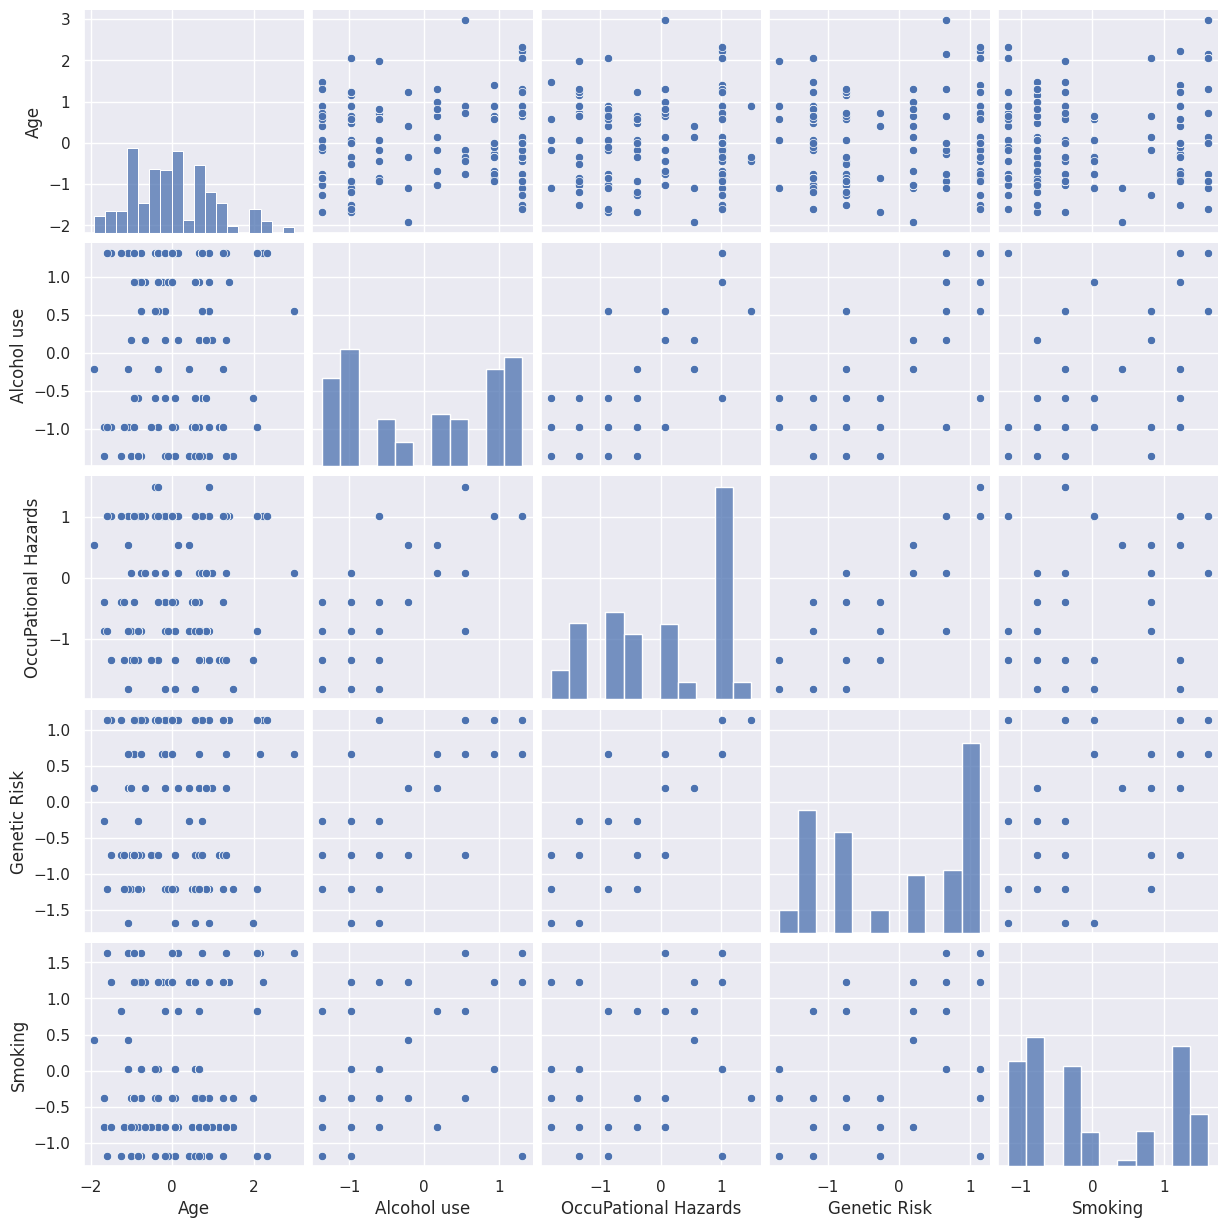

In [57]:
#pairplot
sns.pairplot(df)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

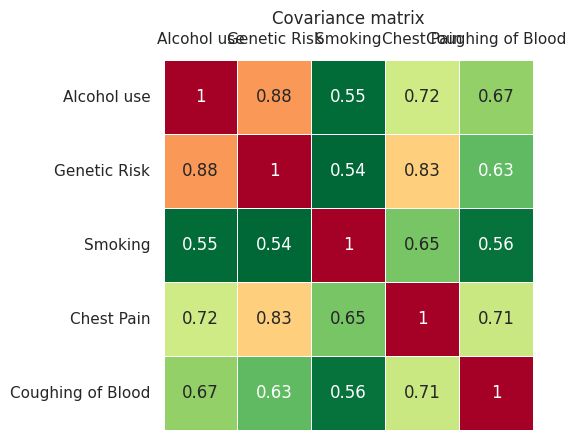

In [72]:
# Center the data by subtracting the mean of numeric columns only
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
dfc = df.copy()  # Create a copy of the original DataFrame
dfc[numeric_df.columns] = numeric_df - numeric_df.mean()  # Center numeric columns

# Now proceed with the rest of your code
plt.figure()
# Calculate covariance only for numeric columns
covariance_matrix = dfc[numeric_df.columns].cov()

ax = sns.heatmap(covariance_matrix, cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
plt.title('Covariance matrix')

**Principal component analysis**

In [73]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to each non-numeric column
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Now you can apply PCA
pca = PCA()
pca.fit(df)  # Fit the PCA model to the encoded data
Z = pca.fit_transform(df)  # Transform the data

# ... (rest of your plotting code) ...

**Eigenvectors**

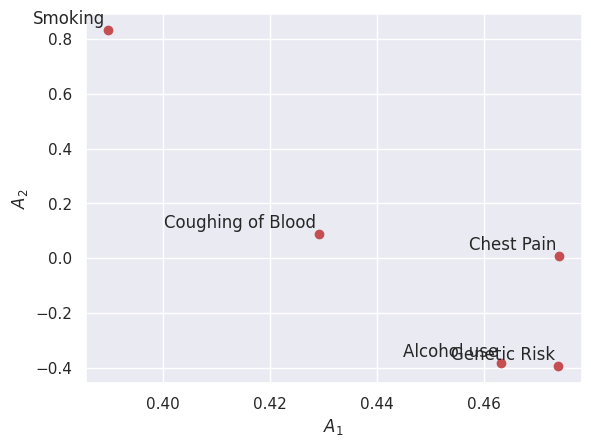

In [74]:
A = pca.components_.T
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


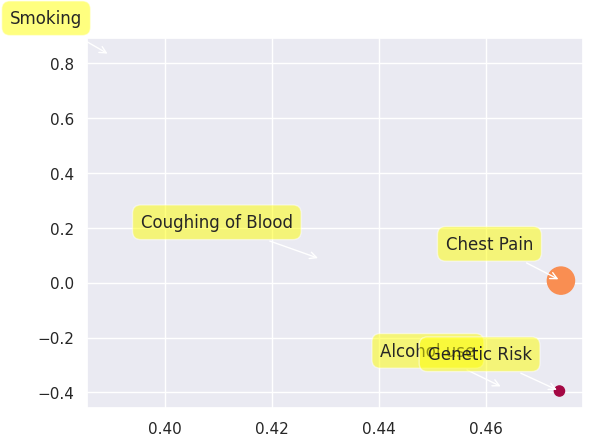

In [75]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

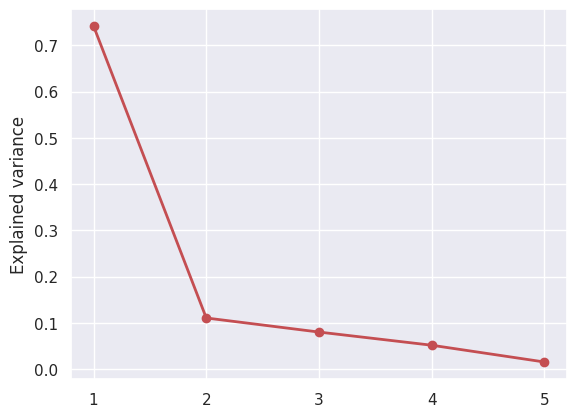

In [76]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explaiend Variance**

Text(0, 0.5, 'Cumulative explained variance')

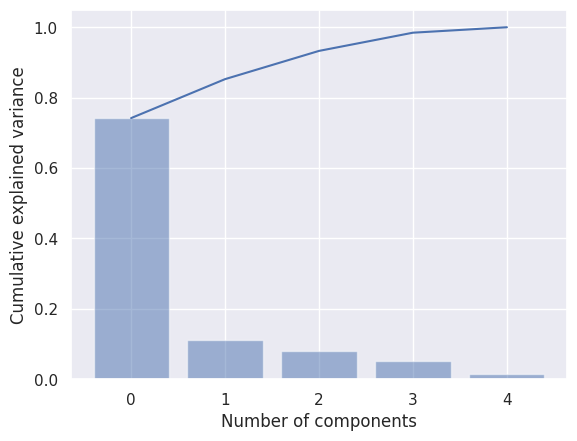

In [77]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

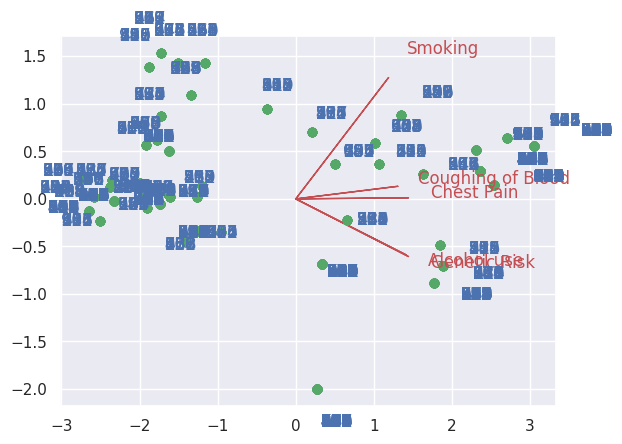

In [79]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal components**

Text(0.5, 1.0, 'Principal components')

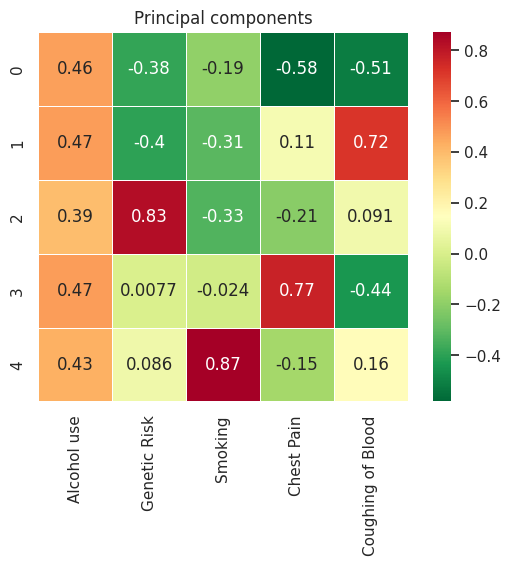

In [80]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')